In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import string

# Webscrapping Imports
from bs4 import BeautifulSoup       
import regex as re

# NLP Imports
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, ImageColorGenerator
import nltk
from spellchecker import SpellChecker

# Modelling Imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ignore warnings
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

#Stylistic Choice:
plt.style.use('bmh')
sns.set_palette("RdBu_r")

In [2]:
#loading in data sets
reviews = pd.read_csv('shopee_reviews.csv')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
#convert text to lower case, remove multiple space and non-English alphabets
reviews['text'] = reviews['text'].str.lower().replace('\s+', ' ', regex=True).str.replace('[^\w\s]','').str.encode("ascii", "ignore").str.decode('ascii')

In [5]:
reviews.info

<bound method DataFrame.info of         label  \
0           5   
1           5   
2           5   
3           5   
4           5   
...       ...   
1502570     5   
1502571     5   
1502572     5   
1502573     1   
1502574     3   

                                                                                                                                                                                                              text  
0                                                                                                                             looks ok not like so durable will hv to use a while to recommend others of its worth  
1                                             tried the current can be very powerful depending on the setting i dont dare to go higher but if go higher sure muscle will become sore and can see the effect faster  
2                                                                                                                           

In [64]:
reviews.head()

,label,text,text_length
0,5,looks ok not like so durable will hv to use a while to recommend others of its worth,18
1,5,tried the current can be very powerful depending on the setting i dont dare to go higher but if go higher sure muscle will become sore and can see the effect faster,32
2,5,item received after a week looks smaller than expected cant wait to try,13
3,5,thanks works as describe no complaints not really expecting any life changing results but thanks,15
4,5,fast delivery considering its from overseas and only tried once not sure about the results yet,16


In [6]:
reviews.dtypes

label    object
text     object
dtype: object

In [7]:
reviews['label'].value_counts(dropna=False, ascending=True)

label          1
2           2352
1           3650
3           6172
4          13443
2          16724
1          24704
3          42911
4          88686
5         166237
5        1137695
Name: label, dtype: int64

In [8]:
reviews.loc[reviews['label'] == 'label']

,label,text
1431262,label,text


As the row does not seem to contain any information, this row will be dropped.

In [9]:
reviews.drop(1431262, inplace=True)

In [10]:
reviews['label'] = pd.to_numeric(reviews['label'])

In [11]:
reviews['label'].value_counts(dropna=False)

5    1303932
4     102129
3      49083
1      28354
2      19076
Name: label, dtype: int64

In [12]:
reviews.head(10)

,label,text
0,5,looks ok not like so durable will hv to use a while to recommend others of its worth
1,5,tried the current can be very powerful depending on the setting i dont dare to go higher but if go higher sure muscle will become sore and can see the effect faster
2,5,item received after a week looks smaller than expected cant wait to try
3,5,thanks works as describe no complaints not really expecting any life changing results but thanks
4,5,fast delivery considering its from overseas and only tried once not sure about the results yet
5,5,fast delivery good service
6,5,got my order and it came well packaged have yet to try but looks good so far thanks
7,5,items received in a nice box have not used it yet hopefully it works
8,5,received in good condition tried so far so good not that bad
9,1,item doesnt work asked me to send a refund show a non working machine and deem not enough evidence dont waste time buying


In [13]:
#check for duplicate posts
print("Duplicates: " + str(reviews[['text']].duplicated().sum()))
print("\n")
 
#check for null entries
print("No. of null entries: " + "\n"  + str(reviews.isnull().sum()))

Duplicates: 71884


No. of null entries: 
label    0
text     0
dtype: int64


In [14]:
reviews[reviews['text'].duplicated()==True]

,label,text
128,5,well received
135,5,good
233,5,good
257,5,fast delivery
388,5,fast delivery
...,...,...
1502514,5,fast deliverygood
1502530,5,received in good condition highly recommended
1502561,5,its comfy
1502568,4,a bit tight


A good number of duplicates seem to be legitimate reviews such as having 'Good' in the comments. Duplicates will remain for now.

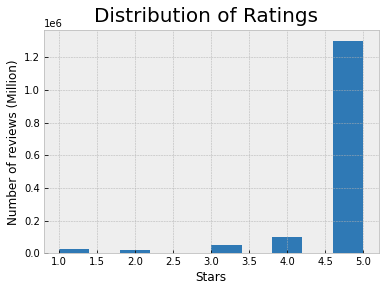

In [76]:
reviews['label'].hist()
plt.xlabel("Stars")
plt.ylabel("Number of reviews (Million)")
plt.suptitle("Distribution of Ratings", size=20)
plt.subplots_adjust(top=.9)
plt.show()

In [16]:
#creating a column to hold the length of text
reviews['text_length'] = [len(i.split()) for i in reviews['text']]

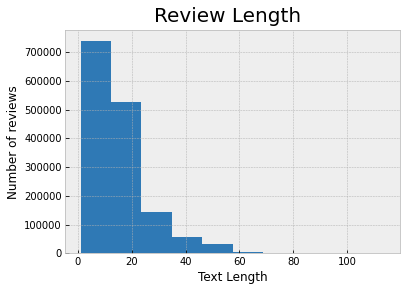

In [72]:
reviews['text_length'].hist()
plt.xlabel("Text Length")
plt.ylabel("Number of reviews")
plt.suptitle("Review Length", size=20)
plt.subplots_adjust(top=.9)
plt.show()

In [18]:
#summary of text length
reviews[['text_length']].describe()

,text_length
count,1.502574e+06
mean,1.511385e+01
std,1.028011e+01
min,0.000000e+00
25%,9.000000e+00
50%,1.300000e+01
75%,1.900000e+01
max,1.140000e+02


In [19]:
#filtering and printing of reviews with no text
no_reviews = reviews[reviews['text_length']==0]
print(no_reviews)

         label   text  text_length
93           5                   0
645          5                   0
667          3                   0
870          5                   0
1094         5                   0
...        ...    ...          ...
1500906      5                   0
1501094      3                   0
1501339      1                   0
1501487      5                   0
1502137      5                   0

[4188 rows x 3 columns]


In [20]:
#dropping of rows without any text
reviews = reviews.loc[reviews['text_length'] != 0]

In [21]:
reviews[['text_length']].describe()

,text_length
count,1.498386e+06
mean,1.515610e+01
std,1.026332e+01
min,1.000000e+00
25%,9.000000e+00
50%,1.300000e+01
75%,1.900000e+01
max,1.140000e+02


In [22]:
#filtering and printing of length text 3 or less
short_reviews = reviews[reviews['text_length']<4]
print(short_reviews)

         label                     text  text_length
10           5               fast great            2
15           5                    good             1
26           5  received well packaged             3
32           5      received fast nice             3
34           5            well received            2
...        ...                      ...          ...
1502514      5        fast deliverygood            2
1502515      5        very worth buying            3
1502561      5                its comfy            2
1502568      4             a bit tight             3
1502569      5                came fast            2

[66283 rows x 3 columns]


In [23]:
#filtering and printing of length text of more than 19
long_reviews = reviews[reviews['text_length']>19]
print(long_reviews)

         label  \
1            5   
9            1   
16           5   
19           5   
21           5   
...        ...   
1502544      5   
1502545      5   
1502548      5   
1502571      5   
1502572      5   

                                                                                                                                                                                                              text  \
1                                             tried the current can be very powerful depending on the setting i dont dare to go higher but if go higher sure muscle will become sore and can see the effect faster   
9                                                                                   item doesnt work  asked me to send a refund  show a non working machine and deem not enough evidence  dont waste time buying     
16                                                                                                                    box was a little beat u

In [24]:
gdreviews = reviews.loc[reviews['label'] > 3]
badreviews = reviews.loc[reviews['label'] < 3]
avgreviews = reviews.loc[reviews['label'] == 3]

In [25]:
gdreviews

,label,text,text_length
0,5,looks ok not like so durable will hv to use a while to recommend others of its worth,18
1,5,tried the current can be very powerful depending on the setting i dont dare to go higher but if go higher sure muscle will become sore and can see the effect faster,32
2,5,item received after a week looks smaller than expected cant wait to try,13
3,5,thanks works as describe no complaints not really expecting any life changing results but thanks,15
4,5,fast delivery considering its from overseas and only tried once not sure about the results yet,16
...,...,...,...
1502568,4,a bit tight,3
1502569,5,came fast,2
1502570,5,tried and it fit nicely will buy fast and good will buy again,13
1502571,5,its a fantastic product very reasonable price and very good quality the seller replies to all queries and is very professional the pacaging was done very nicely and delivered within 10days of purchase,33


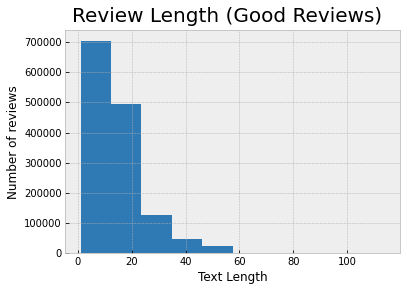

In [75]:
gdreviews['text_length'].hist()
plt.xlabel("Text Length")
plt.ylabel("Number of reviews")
plt.suptitle("Review Length (Good Reviews)", size=20)
plt.subplots_adjust(top=.9)
plt.show()

In [26]:
badreviews

,label,text,text_length
9,1,item doesnt work asked me to send a refund show a non working machine and deem not enough evidence dont waste time buying,23
65,1,i just got a electric shock with this thing wth its really bad,13
81,2,item received few days ago abdominal left and right parts not working vibration feedback to the seller but no result given,21
153,1,material feels like styrofoam and the backbone of the roller feels like toilet roll not keen to use it not a good buy,23
456,2,not to my liking,4
...,...,...,...
1502467,1,recieve item but packaging a very badthe shoes are so grumble,11
1502522,1,such poor quality and undersize dont waste your money on this,11
1502547,1,seller claims its normal for the printing to be like this take note to all buyers out there,18
1502559,2,bought it for friend not bad can find cheaper price if browse more,13


In [27]:
avgreviews

,label,text,text_length
71,3,items received all items looks very small compared to pictures in the ad listing,14
74,3,do not like the fit so much very different material as compared to other design in the same brand,19
132,3,came quite fast havent tried yet,6
148,3,received item yesterday tested the device and it is working great just that its a bit flimsy,17
150,3,product is great however delivery man left at the door without informing,12
...,...,...,...
1502486,3,the shoes is pretty good soft and lucky got one size bigger,12
1502499,3,okay quality for this price hope they last me sometime just realised this damage in the photo so reducing the rating,21
1502508,3,arrived safely but colour did not match with the 1 i requested,12
1502546,3,very thin material and might not last long,8


In [28]:
gdreviews['label'].value_counts(dropna=False, ascending=True)

4     101976
5    1300226
Name: label, dtype: int64

In [29]:
sample_gd_reviews = gdreviews.sample(n=10000, random_state=1)

In [30]:
sample_gd_reviews['label'].value_counts(dropna=False, ascending=True)

4     732
5    9268
Name: label, dtype: int64

In [31]:
badreviews['label'].value_counts(dropna=False, ascending=True)

2    19011
1    28215
Name: label, dtype: int64

In [32]:
sample_bad_reviews = badreviews.sample(n=10000, random_state=1)

In [33]:
sample_bad_reviews['label'].value_counts(dropna=False, ascending=True)

2    4022
1    5978
Name: label, dtype: int64

In [34]:
avgreviews['label'].value_counts(dropna=False, ascending=True)

3    48958
Name: label, dtype: int64

In [35]:
sample_avg_reviews = avgreviews.sample(n=10000, random_state=1)

In [36]:
sample_avg_reviews['label'].value_counts(dropna=False, ascending=True)

3    10000
Name: label, dtype: int64

In [37]:
spell = SpellChecker(distance=3)

sample_gd_reviews['text'] = sample_gd_reviews['text'].apply(spell.correction)

In [65]:
sample_gd_reviews_train = sample_gd_reviews.sample(n=1000, random_state=1)
sample_gd_reviews_test = sample_gd_reviews.sample(n=100, random_state=2)

In [39]:
custom_stopwords = nltk.corpus.stopwords.words('english')

wn = nltk.WordNetLemmatizer()

# Creating a function that removes punctuation and numbers, and tokenizes and lemmatizes text
def clean_text(text):
    
    # Removes words that are all numeric characters, or words mixed with numbers
    text = re.sub(r'\w*\d\w*', '', text)
   
    # Tokenisation and punctuation removal. \W matches any non-word character (equivalent to [^a-zA-Z0-9_]).
    # Since \W does not match underscores, we specify '\W+|_' (\W or underscore).
    # Splits the text at any of these non-word characters (or groups of them). 
    # The '+' is to handle cases where there are 2 or more non-word characters between certain words
    tokens = re.split('\W+|_', text)

    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    tokens = " ".join([wn.lemmatize(word.lower()) for word in tokens if word.lower() not in custom_stopwords]) 
     
    return tokens

In [40]:
sample_gd_reviews['text'] = sample_gd_reviews['text'].apply(clean_text)
sample_gd_reviews['text']

64181                                                                                                                           bad product slow delivery
564442                                                                                                                       thanks seller fast delivered
662274                                                                                                                  item received condition described
421697     item came dented box say tried work well maybe also need press harder onto skin trim painless wise little bit press hard onto area wanted trim
195939                                                                                                                 nice promo price repeated customer
                                                                                ...                                                                      
1174725                                                                     

# Text Data Analysis

## Count Vectorizer

In [41]:
#creating instances of Count Vectorizers
count_vect = CountVectorizer()
count_vect2 = CountVectorizer(ngram_range=(2,2))
count_vect3 = CountVectorizer(ngram_range=(3,3))
count_vect4 = CountVectorizer(ngram_range=(4,4))

           Observations
good               4266
delivery           2795
received           2640
item               2361
fast               2309
condition          1527
seller             1523
well               1501
quality            1210
thank               958


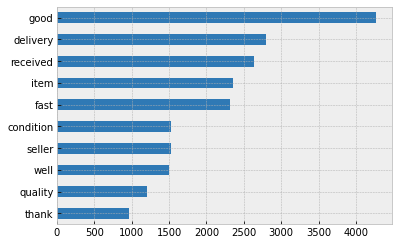

In [42]:
sample_gd_reviews_counts = pd.DataFrame(count_vect.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect.get_feature_names())
sample_gd_reviews_counts.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_counts = sample_gd_reviews_counts.sum().sort_values(ascending=False).to_frame(name='Observations')
print(sample_gd_reviews_counts.head(10))

                Observations
fast delivery           1386
good condition          1315
received good            864
item received            643
good quality             484
thanks seller            278
well packed              268
well received            263
received item            245
yet try                  242


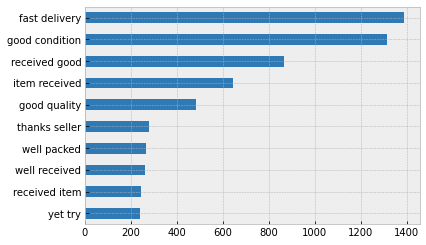

In [43]:
sample_gd_reviews_counts_2 = pd.DataFrame(count_vect2.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect2.get_feature_names())
sample_gd_reviews_counts_2.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_counts_2 = sample_gd_reviews_counts_2.sum().sort_values(ascending=False).to_frame(name='Observations')
print(sample_gd_reviews_counts_2.head(10))

                         Observations
received good condition           741
item received good                326
item good condition               131
item well received                113
fast delivery good                108
received item good                 95
came good condition                87
super fast delivery                84
fast delivery item                 83
good condition fast                82


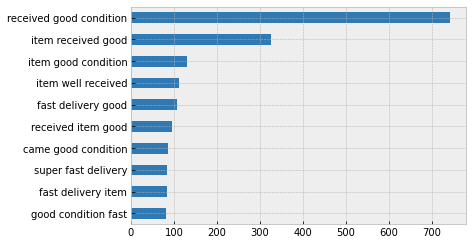

In [44]:
sample_gd_reviews_counts_3 = pd.DataFrame(count_vect3.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect3.get_feature_names())
sample_gd_reviews_counts_3.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_counts_3 = sample_gd_reviews_counts_3.sum().sort_values(ascending=False).to_frame(name='Observations')
print(sample_gd_reviews_counts_3.head(10))

                                  Observations
item received good condition               301
received item good condition                82
good condition fast delivery                67
received good condition fast                56
item came good condition                    45
received good condition delivery            40
delivery received good condition            34
fast delivery received good                 33
fast delivery good quality                  33
good condition yet try                      32


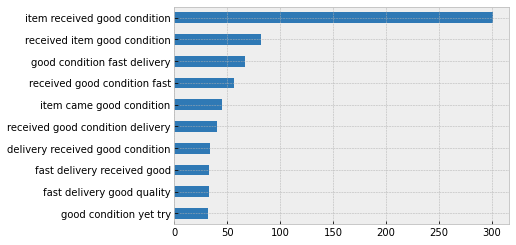

In [45]:
sample_gd_reviews_counts_4 = pd.DataFrame(count_vect4.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect4.get_feature_names())
sample_gd_reviews_counts_4.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_counts_4 = sample_gd_reviews_counts_4.sum().sort_values(ascending=False).to_frame(name='Observations')
print(sample_gd_reviews_counts_4.head(10))

## tf-idf Vectorizer

In [46]:
#creating instances of tfidf Vectorizers
tfidf_vect = TfidfVectorizer()
tfidf_vect2 = TfidfVectorizer(ngram_range=(2, 2))
tfidf_vect3 = TfidfVectorizer(ngram_range=(3, 3))
tfidf_vect4 = TfidfVectorizer(ngram_range=(4, 4))

           Weighted Score
good           683.534236
delivery       511.240312
received       500.455590
fast           482.743929
item           449.941350
condition      377.164044
well           320.278803
seller         296.257119
quality        294.094303
thank          249.878784


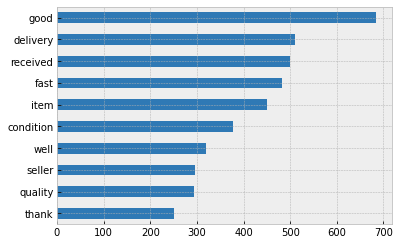

In [47]:
sample_gd_reviews_tfidfcounts = pd.DataFrame(tfidf_vect.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect.get_feature_names())
sample_gd_reviews_tfidfcounts.sum().sort_values(ascending=True).tail(10).plot(kind='barh');
sample_gd_reviews_tfidfcounts = sample_gd_reviews_tfidfcounts.sum().sort_values(ascending=False).to_frame(name='Weighted Score')
print(sample_gd_reviews_tfidfcounts.head(10))

                Weighted Score
fast delivery       242.767471
good condition      232.191496
received good       178.162742
item received       135.370122
good quality        112.541182
well received        69.327768
well packed          63.675446
thanks seller        63.459108
yet try              59.203714
received item        57.831686


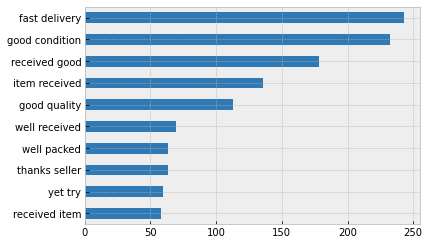

In [48]:
sample_gd_reviews_tfidfcounts_2 = pd.DataFrame(tfidf_vect2.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect2.get_feature_names())
sample_gd_reviews_tfidfcounts_2.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_tfidfcounts_2 = sample_gd_reviews_tfidfcounts_2.sum().sort_values(ascending=False).to_frame(name='Weighted Score')
print(sample_gd_reviews_tfidfcounts_2.head(10))

                         Weighted Score
received good condition      147.097666
item received good            78.670191
fast delivery good            36.309982
item good condition           35.600920
item well received            30.194572
good condition fast           29.106565
received item good            27.173823
condition fast delivery       25.227656
super fast delivery           24.842946
fast delivery item            24.387996


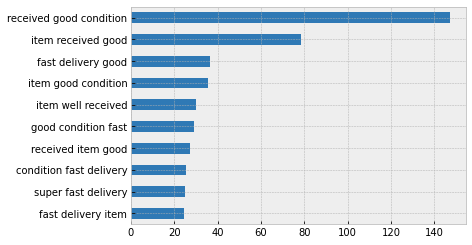

In [49]:
sample_gd_reviews_tfidfcounts_3 = pd.DataFrame(tfidf_vect3.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect3.get_feature_names())
sample_gd_reviews_tfidfcounts_3.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_tfidfcounts_3 = sample_gd_reviews_tfidfcounts_3.sum().sort_values(ascending=False).to_frame(name='Weighted Score')
print(sample_gd_reviews_tfidfcounts_3.head(10))

                                  Weighted Score
item received good condition           75.603962
good condition fast delivery           24.648984
received item good condition           24.121677
received good condition fast           21.135061
fast delivery good quality             14.105086
received good condition thank          13.948386
received good condition delivery       13.732781
item came good condition               13.395465
received good condition thanks         11.175958
good condition yet try                 10.972435


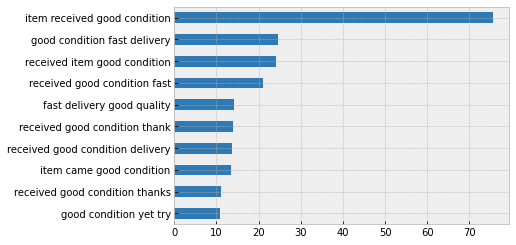

In [50]:
sample_gd_reviews_tfidfcounts_4 = pd.DataFrame(tfidf_vect4.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect4.get_feature_names())
sample_gd_reviews_tfidfcounts_4.sum().sort_values(ascending=True).tail(10).plot(kind='barh')
sample_gd_reviews_tfidfcounts_4 = sample_gd_reviews_tfidfcounts_4.sum().sort_values(ascending=False).to_frame(name='Weighted Score')
print(sample_gd_reviews_tfidfcounts_4.head(10))

# Word Cloud

In [51]:
#preparing data for use for generating word clouds

sample_gd_reviews_counts_2_wc = pd.DataFrame(count_vect2.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect2.get_feature_names()).sum().sort_values(ascending=False)
sample_gd_reviews_counts_3_wc = pd.DataFrame(count_vect.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=count_vect.get_feature_names()).sum().sort_values(ascending=False)

sample_gd_reviews_tfidfcounts_2_wc = pd.DataFrame(tfidf_vect2.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect2.get_feature_names()).sum().sort_values(ascending=False)
sample_gd_reviews_tfidfcounts_3_wc = pd.DataFrame(tfidf_vect.fit_transform(sample_gd_reviews['text']).toarray(),
                  columns=tfidf_vect.get_feature_names()).sum().sort_values(ascending=False)

In [52]:
from matplotlib.colors import LinearSegmentedColormap

#color scheme for count vetorizer word clouds
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

#parameters for word clouds
wc_sample_gd_reviews_counts_2 = WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(sample_gd_reviews_counts_2_wc) 

wc_sample_gd_reviews_tfidfcounts_2= WordCloud(width = 1200, height = 900, background_color ='white',
                  colormap=cmap).generate_from_frequencies(sample_gd_reviews_tfidfcounts_2_wc) 

In [53]:
#color scheme for tfidf vetorizer word clouds
colors2 = ["#ffffff", "#fdfdfd", "#fdfdff", "#fdffff", "#fefefe", "#fefeff"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors2)

#parameters for word clouds
wc_sample_gd_reviews_counts_3 = WordCloud(width = 1200, height = 900, background_color ='black',
                  colormap=cmap2).generate_from_frequencies(sample_gd_reviews_counts_3_wc) 

wc_sample_gd_reviews_tfidfcounts_3 = WordCloud(width = 1200, height = 900, background_color ='black',
                  colormap=cmap2).generate_from_frequencies(sample_gd_reviews_tfidfcounts_3_wc) 

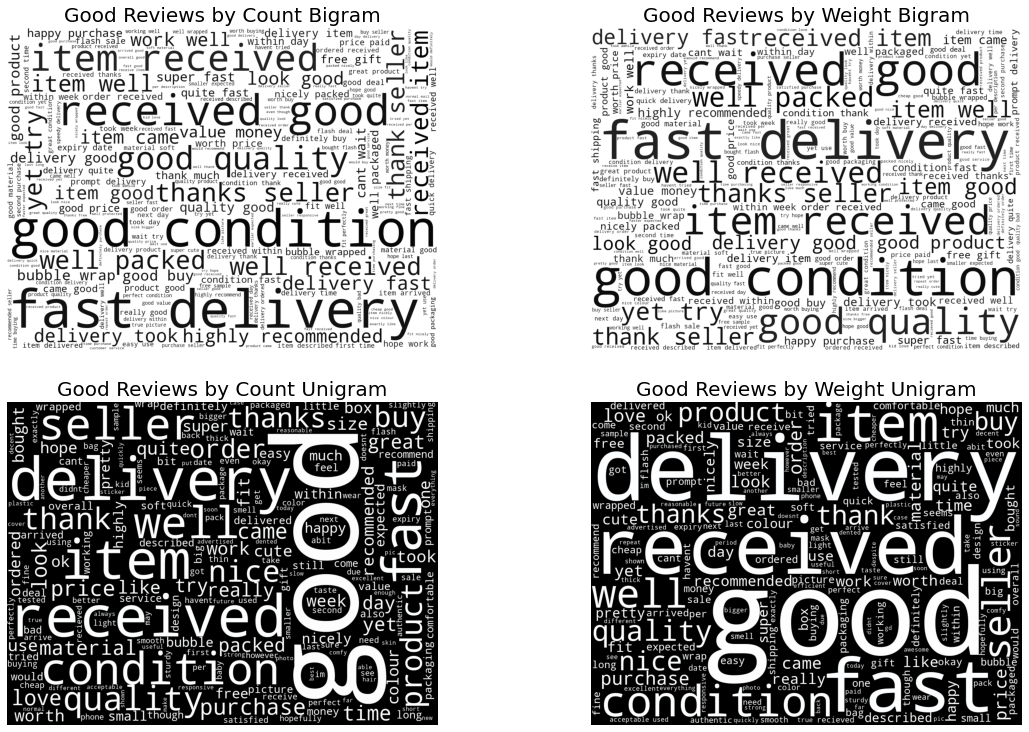

In [54]:
#generating word clouds
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
ax[0,0].imshow(wc_sample_gd_reviews_counts_2)
ax[0,1].imshow(wc_sample_gd_reviews_tfidfcounts_2)
ax[1,0].imshow(wc_sample_gd_reviews_counts_3)
ax[1,1].imshow(wc_sample_gd_reviews_tfidfcounts_3)

ax[0,0].set_title('Good Reviews by Count Bigram',size=20)
ax[0,1].set_title('Good Reviews by Weight Bigram',size=20)
ax[1,0].set_title('Good Reviews by Count Unigram',size=20)
ax[1,1].set_title('Good Reviews by Weight Unigram',size=20)

ax[0,0].axis('off')
ax[0,1].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')

plt.tight_layout(h_pad = 3.0,pad=0.1)

In [73]:
ax[0,0].imshow(wc_sample_gd_reviews_counts_2)

In [55]:
sample_gd_reviews_check = sample_gd_reviews['text']
sample_gd_reviews_check_A = sample_gd_reviews_check[sample_gd_reviews_check.str.contains('delivery' and 'fast')]
print(sample_gd_reviews_check_A)

564442                                                                        thanks seller fast delivered
32264                                                  nice quality fast delivery installed tested working
1371272                                                                                fast deliverythanks
634187                                                                            good promo fast delivery
520311        item recieved fast great condition bang buck seller polite responsive definitely recommended
                                                        ...                                               
1137552                                yet try read review good fast delivery item received good condition
9070       amazing product received giveaway hiccup delivery settled overall fast delivery would recommend
1174725                                                            fast next day delivery good value money
1349963                              

In [56]:
sample_gd_reviews_check_B = sample_gd_reviews_check[sample_gd_reviews_check.str.contains('not') & sample_gd_reviews_check.str.contains('bad')]
print(sample_gd_reviews_check_B)

1168096                                                                                   quality dress bad seems fit quite well consider purchasing another one
208815     bad quality price paid love item much better got another colour get future colour going see got colour get anyway thanks seller really happy get item
1112227                                well wrapped recieved good condition far expiring bad service delivery guy package left outside door without notification
82030                                                                    received good condition bad slightly smaller old set cannot use together still fun play
592221                                                                                                                          nothing bad say good worth price
1020645                                                                                                bad bluetooth cannot connect one laptop delivery took day
51894                             

In [57]:
sample_gd_reviews_check_B = sample_gd_reviews_check[sample_gd_reviews_check.str.contains('condition')]
print(sample_gd_reviews_check_B)

662274                                                                  item received condition described
111590                                                              neatly packed received good condition
350313     received day ordering item received good condition price affordable definitely satisfied order
520311       item recieved fast great condition bang buck seller polite responsive definitely recommended
367816                 delivery took quite mask received good condition there compartment put mask filter
                                                        ...                                              
1446565                           album received came box bubble wrapped protection good condition thanks
220408                                                            parcel received week good condition buy
1137552                               yet try read review good fast delivery item received good condition
781265                                        

In [58]:
sample_gd_reviews_check_C = sample_gd_reviews_check[sample_gd_reviews_check.str.contains('fast')]
print(sample_gd_reviews_check_C)

564442                                                                        thanks seller fast delivered
32264                                                  nice quality fast delivery installed tested working
1371272                                                                                fast deliverythanks
634187                                                                            good promo fast delivery
520311        item recieved fast great condition bang buck seller polite responsive definitely recommended
                                                        ...                                               
1137552                                yet try read review good fast delivery item received good condition
9070       amazing product received giveaway hiccup delivery settled overall fast delivery would recommend
1174725                                                            fast next day delivery good value money
1349963                              

In [59]:
sample_gd_reviews_check_D = sample_gd_reviews_check[sample_gd_reviews_check.str.contains('product')]
print(sample_gd_reviews_check_D)

64181                                                                            bad product slow delivery
508485                                acceptable delivery time product nice well sewn love design buy soon
457969                                              product received good condition nose abit painful used
1045613        impressed really surprised came within day despite circuit breaker period product work well
1025227                                                        product great condition stated reached week
                                                        ...                                               
215473                                                fast response delivery bought many time good product
1049125                                                  product super pretty delivery ok worth price paid
1467419                                                                 shipment fast product quality good
9070       amazing product received g

In [60]:
sample_gd_reviews_train

,label,text,text_length
286389,5,nice fast delivery the material of the bag is kind of soft but having nice feeling love it,18
845794,5,ok absorb but not totally dry,6
289270,5,dishonest seller bought 6 pcs of masks and 1 pcs strip came off contacted seller and agreed to issue me a 390 discount code for a new order was scammed after they received my preious order payment then canceled my new order so ridiculous asked me to reorder 1 pcs then they will send me 2,56
937293,5,super fast delivery good price for great product,8
530827,5,responsive seller and good product delivery a bit slow may consider change to other logistics provider,16
...,...,...,...
710352,5,fast delivery looks nice nice packaging received the product in a box within a larger box,16
1397894,5,fast delivery ordered on 2152020 n received on 2652020,9
1260774,5,received with thanks received with thanks received with thanks received with thanks,12
529149,5,very prompt delivery and response items neatly and hygienically packed inappropriate zipbloc my first time ordering,16


In [61]:
sample_gd_reviews_test

,label,text,text_length
873624,5,toothbrushes were packed in a black plastic bag as shown but i cant complain as the toothbrushes are intact and not damaged i usually buy from venus but the shops are closed due to circuit breaker and the online venus doesnt sell delivery time was acceptable,46
1338781,5,good service by seller they follow up closely to ensure all the spec are fulfilled highly recommended,17
190642,5,amazing save a but of money la and good that you can use this coupon immediately,16
1387668,5,item received and it is the same as picture shows,10
121507,5,delivery is slow item received with box dented lucky item is in good condition,14
...,...,...,...
1086059,5,fast chargin worth it as the price is cheap although the wire is long the charging speed is still fast,20
241680,5,looks exactly in the picture and bag is perfect for my body size luv it,15
1148057,5,arrived in the mail in padded envelope in time as new makeup for cnys first day nice colour quite pigmented so have to be careful not to use too much,30
713049,5,tkz seller fast delivery only took 5days item received in good condition not as i expected nice dress on model picture simple normal dress to me fabric its ok thin polyester wth spandex not too warm follow seller measurement thanks you jt for delivery always inform me in watsapp,49


In [66]:
#exporting cleaned collected data
sample_gd_reviews_train.to_csv('train', index=False)
sample_gd_reviews_test.to_csv('test', index=False)